In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### sample

In [7]:
green =cv2.imread('./images/green.png', 1)
hsv = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

print(np.unique(h), np.unique(s), np.unique(v))

[63] [254 255] [190 191 192 193]


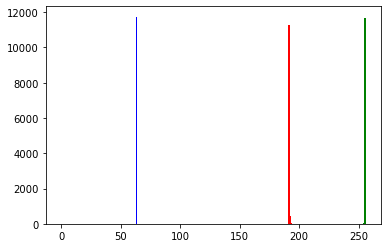

In [9]:
plt.hist(x=h.ravel(), bins =256, range = [0,256], color = 'b')
plt.hist(x=s.ravel(), bins =256, range = [0,256], color = 'g')
plt.hist(x=v.ravel(), bins =256, range = [0,256], color = 'r')
plt.show()

### img에 적용

In [14]:
img =cv2.imread('./images/sample1.png', 1)
result = img.copy()
mask = img.copy()

In [15]:
hvs_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, v, s = cv2.split(hvs_img)

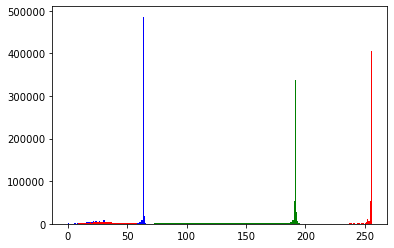

In [16]:
plt.hist(x=h.ravel(), bins =256, range = [0,256], color = 'b')
plt.hist(x=s.ravel(), bins =256, range = [0,256], color = 'g')
plt.hist(x=v.ravel(), bins =256, range = [0,256], color = 'r')
plt.show()

In [17]:
#[63] [254 255] [190 191 192 193]
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        hh = h[r,c]==63
        vv = v[r,c]>= 254 and v[r,c]<= 255
        ss = s[r,c]>= 190 and s[r,c]<= 193

        if not(hh and ss and vv):
            result[r, c, :]= img[r,c,:]
            mask[r,c,:] = 255
        else:
            result[r, c, :]= 0
            mask[r,c,:] = 0

In [18]:
all = np.hstack((img, result, mask))


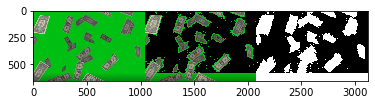

In [19]:
plt.imshow(cv2.cvtColor(all, cv2.COLOR_BGR2RGB))
